In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Reframes our qualitative question ("Is this difference real?") into a
mathematical question ("What is the probability that the difference I am
observing is due to chance?")
● Goal: reject or not to reject the null hypothesis:

* Question 1: Is my data Categorical or Numerical?
* Question 2: How many samples am I comparing?

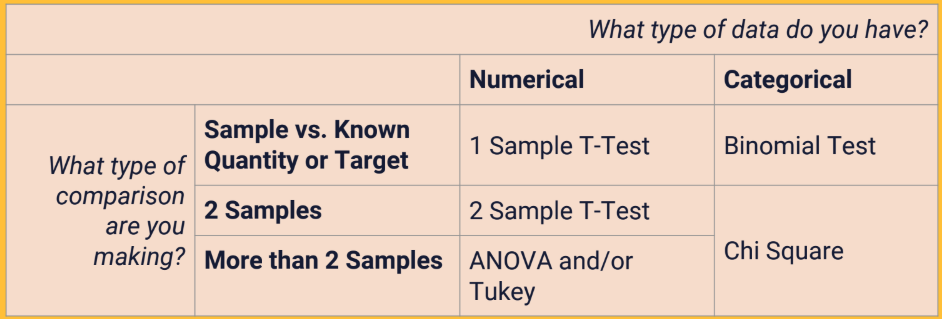
https://www.youtube.com/watch?v=dPXBN8ms-cU


### Caclulating Z score

In [ ]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the standard error
std_error = np.std(late_shipments_boot_distn,ddof=1)

# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Print z_score
print(z_score)

### Calculating P Value
The p-value is calculated by transforming the z-score with the standard normal cumulative distribution function.

In [ ]:
# Calculate the z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

# Calculate the p-value (right tail)
p_value = 1-norm.cdf(z_score)
                 
# Print the p-value
print(p_value) 

### Confidence interval
https://campus.datacamp.com/courses/hypothesis-testing-in-python/yum-that-dish-tests-good-1?ex=11

## One Sample T -Test

Compares a sample mean to a hypothetical population mean. It answers the question
"What is the probability that the sample came from a distribution with the desired
mean?"
Use this when you are comparing against a known target (like a statistic from a paper
or a target metric).

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np

ages = np.genfromtxt("ages.csv")

print(ages)

ages_mean = np.mean(ages)
tset, pval = ttest_1samp(ages, 30)

print pval

In [3]:
from scipy.stats import ttest_1samp
import numpy as np

correct_results = 0 # Start the counter at 0

daily_visitors = np.genfromtxt("daily_visitors.csv", delimiter=",")

for i in range(1000): # 1000 experiments
   #your ttest here:
   t, pval = ttest_1samp(daily_visitors[i], 30) # perform t-test
   if pval < 0.05: # check our p-value
       correct_results += 1
    #print the pvalue here:
   print pval
print "We correctly recognized that the distribution was different in " + str(correct_results) + " out of 1000 experiments."
  

If we get a pval < 0.05, we can conclude that it is unlikely that our sample has a true mean of 30. Thus, the hypothesis test has correctly rejected the null hypothesis, and we call that a correct result.

Every time we get a correct result within the 1000 experiments, add 1 to correct_results

## Two Sample T-Test
A 2 Sample T-Test compares two sets of data, which are both approximately normally distributed.
The null hypothesis, in this case, is that the two distributions have the same mean.
Use this when you are comparing two different numerical samples.

In [ ]:
tstat, pval = ttest_ind(example_distribution1, example_distribution2)

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

week1 = np.genfromtxt("week1.csv",  delimiter=",")
week2 = np.genfromtxt("week2.csv",  delimiter=",")

week1_mean = np.mean(week1)
week2_mean = np.mean(week2)

print week1_mean, week2_mean

week1_std = np.std(week1)
week2_std = np.std(week2)

print week1_std, week2_std

tstat, pval = ttest_ind(week1, week2)
print pval

**Dangers of Multiple T-Tests**reproducibility crisis
Suppose that we own a chain of stores that sell ants, called VeryAnts. There are three different locations: A, B, and C. We want to know if the average ant sales over the past year are significantly different between the three locations.

At first, it seems that we could perform T-tests between each pair of stores.

We know that the p-value is the probability that we incorrectly reject the null hypothesis on each t-test. The more t-tests we perform, the more likely that we are to get a false positive, a Type I error.

For a p-value of 0.05, if the null hypothesis is true then the probability of obtaining a significant result is 1 – 0.05 = 0.95. When we run another t-test, the probability of still getting a correct result is 0.95 * 0.95, or 0.9025. That means our probability of making an error is now close to 10%! This error probability only gets bigger with the more t-tests we do.

In [ ]:
from scipy.stats import ttest_ind
import numpy as np

a = np.genfromtxt("store_a.csv",  delimiter=",")
b = np.genfromtxt("store_b.csv",  delimiter=",")
c = np.genfromtxt("store_c.csv",  delimiter=",")

a_mean = np.mean(a)
b_mean = np.mean(b)
c_mean = np.mean(c)

a_std = np.std(a)
b_std = np.std(b)
c_std = np.std(c)

a_b_pval = ttest_ind(a, b).pvalue
a_c_pval = ttest_ind(a, c).pvalue
b_c_pval = ttest_ind(b, c).pvalue

error_prob = (1-(0.95**3))

## ANOVA
When comparing more than two numerical datasets, the best way to preserve a Type I error probability of 0.05 is to use ANOVA. ANOVA (Analysis of Variance) tests the null hypothesis that all of the datasets have the same mean. If we reject the null hypothesis with ANOVA, we're saying that at least one of the sets has a different mean; however, it does not tell us which datasets are different. It compares more than 2 numerical datasets without increasing the probability of  false positive.

In order to use ANOVA,
1. The samples should be normally distributed (ish)
2. The standard deviations of the data should be similar (ish)
3. The samples should be independent

In [ ]:
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
import numpy as np

a = np.genfromtxt("store_a.csv",  delimiter=",")
b = np.genfromtxt("store_b_new.csv",  delimiter=",")
c = np.genfromtxt("store_c.csv",  delimiter=",")

stat, pval = f_oneway(a, b, c)
print pval

## Tukey's Range Test 

- compares more than 2 numerical datasets without increasing the
probability of a false positive. Unlike ANOVA, Tukey tells us **which datasets are
significantly different.** Many statisticians use Tukey instead of Anova.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway
import numpy as np

a = np.genfromtxt("store_a.csv",  delimiter=",")
b = np.genfromtxt("store_b.csv",  delimiter=",")
c = np.genfromtxt("store_c.csv",  delimiter=",")

stat, pval = f_oneway(a, b, c)
print pval

# Using our data from ANOVA, we create v and l
v = np.concatenate([a, b, c])
labels = ['a'] * len(a) + ['b'] * len(b) + ['c'] * len(c)

tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print tukey_results

## Binomial Test
Compares an observed proportion to a theoretical ideal.

Examples:
- Comparing the actual percent of emails that were opened to the quarterly goals
- Comparing the actual percentage of respondents who gave a certain survey response to the expected survey response


In [ ]:
from scipy.stats import binom_test

pval = binom_test(510, n=10000, p=0.06)
print pval

pval2 = binom_test(590, n=10000, p=0.06)
print pval2

## Chi Square Test
If we have two or more categorical datasets that we want to compare, we should use a Chi Square test. It is useful in situations like:
- An A/B test where half of users were shown a green submit button and the other half were shown a purple submit button. Was one group more likely to click the submit button?
- Men and women were both given a survey asking "Which of the following
three products is your favorite?" Did the men and women have significantly
different preferences?

In [ ]:
from scipy.stats import chi2_contingency

# input: Contingency table
# The columns are each a different condition, such as men vs. women or Interface A vs. Interface B
# The rows represent different outcomes, like "Survey Response A" vs. "Survey Response B" or "Clicked a Link" vs. "Didn't Click"
#         harvester |  leaf cutter
# ----+------------------+------------
# 1st gr | 30       |  10
# 2nd gr | 35       |  5
# 3rd gr | 28       |  12

X = [[30, 10],
     [35, 5],
     [28, 12]]
chi2, pval, dof, expected = chi2_contingency(X)
print pval